# Step 3 - Climate Analysis and Exploration

Ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. 
All of the following analysis will be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.


In [111]:
# Import 

import matplotlib
#matplotlib.use('nbagg')
#from matplotlib import style
#style.use('seaborn')


from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import pandas as pd
import numpy as np

import seaborn as sns


In [112]:
import datetime as dt


In [113]:
vac_start_dt = dt.date(2018, 1 ,1)
vac_end_dt = dt.date(2018, 1 ,15)

In [114]:
# Import SQLAlchemy `automap` and other dependencies here

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [115]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)


In [116]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [117]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

st_id VARCHAR
rec_date VARCHAR
prcp FLOAT
tobs FLOAT


In [118]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

st_id VARCHAR
st_name VARCHAR
st_latitude FLOAT
st_longitude FLOAT
st_elevation FLOAT


In [119]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [120]:
# Start a session to query the database
session = Session(engine)

In [121]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0)]

In [122]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [123]:
qry_end_dt =  engine.execute('SELECT max(rec_date) FROM measurement LIMIT 10').fetchall()


qry_end_dt = dt.datetime.strptime(qry_end_dt[0][0], '%Y-%m-%d')
qry_start_dt = qry_end_dt - dt.timedelta(days=365)

qry_start_dt = qry_start_dt.strftime("%Y-%m-%d")
qry_end_dt = qry_end_dt.strftime("%Y-%m-%d")

print(f'Query Range : {qry_start_dt} - {qry_end_dt}')



Query Range : 2016-08-23 - 2017-08-23


In [124]:

prcp_stmt = session.query(Measurement.rec_date, Measurement.prcp).\
    filter(Measurement.rec_date > qry_start_dt).\
    filter(Measurement.rec_date <= qry_end_dt).statement



    
prcp_DF = pd.read_sql_query(prcp_stmt, session.bind)
print(f"Total records retrieved : {len(prcp_DF)}")



prcp_DF = prcp_DF.rename(columns={'rec_date': 'Recorded_Date' , 'prcp': 'Precipitation' })
prcp_DF.head()

Total records retrieved : 2015


,Recorded_Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [125]:
prcp_DF['Recorded_Date'] = pd.to_datetime(prcp_DF['Recorded_Date'], format ="%Y-%m-%d")

prcp_DF.head()

print(min(prcp_DF['Recorded_Date']))
print(max(prcp_DF['Recorded_Date']))




2016-08-24 00:00:00
2017-08-23 00:00:00


In [126]:
prcp_DF = prcp_DF.set_index('Recorded_Date')
prcp_DF.head()

,Precipitation
Recorded_Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


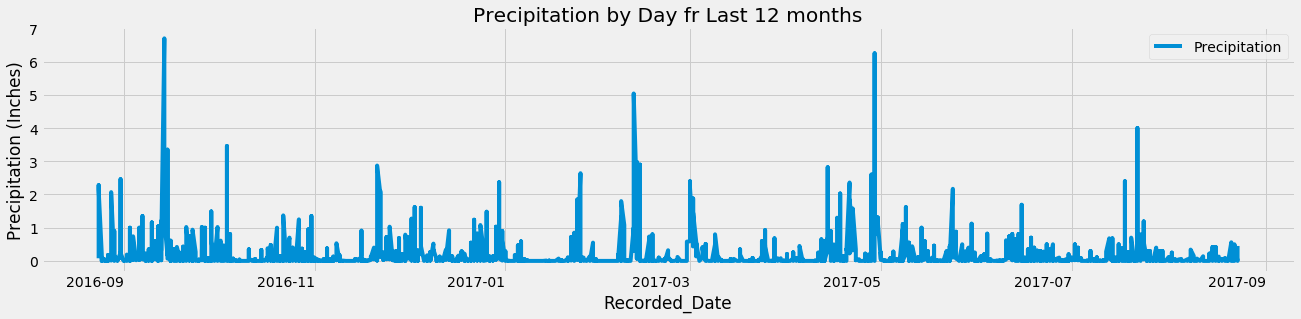

In [127]:

prcp_DF.plot(figsize=(20,5))
plt.title("Precipitation by Day fr Last 12 months")
plt.ylabel("Precipitation (Inches)")
plt.xticks(rotation=360)
plt.savefig('plots/precip.png')
plt.show()



In [128]:
prcp_DF.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.


In [129]:
station_cnt = session.query(Station).count()
print('Total Stations : '+ str(station_cnt))

Total Stations : 9


In [130]:
sel = [Station.st_id,
       func.count(Measurement.st_id).label('count_obs')]
    

st_pf_qry = session.query(*sel).filter(Station.st_id == Measurement.st_id).\
            group_by(Station.st_id).order_by('count_obs DESC').limit(1).statement
print(st_pf_qry)


station_performance = pd.read_sql_query(st_pf_qry, session.bind)

station_performance.head()

print(station_performance['st_id'][0])

SELECT station.st_id, count(measurement.st_id) AS count_obs 
FROM station, measurement 
WHERE station.st_id = measurement.st_id GROUP BY station.st_id ORDER BY count_obs DESC
 LIMIT :param_1
USC00519281


/Users/Hadoop/anaconda3/envs/PythonData1/lib/python3.6/site-packages/sqlalchemy/sql/compiler.py:643: SAWarning: Can't resolve label reference 'count_obs DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


In [131]:
print(qry_start_dt)
print(qry_end_dt)

actv_sta_temp_stmt = session.query(Station.st_id,Measurement.rec_date, Measurement.tobs).\
    filter(Station.st_id == Measurement.st_id).\
    filter(Measurement.rec_date >= qry_start_dt).\
    filter(Measurement.rec_date <= qry_end_dt).\
    filter(Measurement.st_id == station_performance['st_id'][0]).statement


print(actv_sta_temp_stmt)

actv_sta_temp_stmt_DF = pd.read_sql_query(actv_sta_temp_stmt, session.bind)

actv_sta_temp_stmt_DF.head()

2016-08-23
2017-08-23
SELECT station.st_id, measurement.rec_date, measurement.tobs 
FROM station, measurement 
WHERE station.st_id = measurement.st_id AND measurement.rec_date >= :rec_date_1 AND measurement.rec_date <= :rec_date_2 AND measurement.st_id = :st_id_1


,st_id,rec_date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


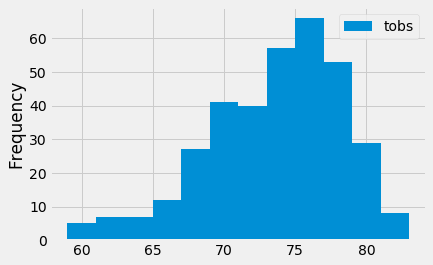

In [132]:
actv_sta_temp_stmt_DF.plot.hist(by="tobs",bins=12)

plt.savefig('plots/temp_hist.png')
plt.show()

# Temparature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


In [133]:
def calc_temps(start_date,end_date):
    sel = [func.min(Measurement.tobs).label('MinimumTemparature'),
           func.max(Measurement.tobs).label('MaximumTemparature'),
           func.avg(Measurement.tobs).label('AverageTemparature')
          ]
    
    calc_temp_values = session.query(*sel).\
                     filter(Measurement.rec_date >= start_date).\
                     filter(Measurement.rec_date <= end_date).\
                     all()
    
    print(calc_temp_values)
    return(calc_temp_values)
   

In [134]:
vac_lastyr_start_dt = vac_start_dt - dt.timedelta(days=365)
vac_lastyr_end_dt = vac_end_dt - dt.timedelta(days=365)


print(f"Vacation plennaed for dates : from {vac_start_dt} to {vac_end_dt}" )
print(f"Vacation matching dates last year : from {vac_lastyr_start_dt} to {vac_lastyr_end_dt}" )


Vacation plennaed for dates : from 2018-01-01 to 2018-01-15
Vacation matching dates last year : from 2017-01-01 to 2017-01-15


In [135]:
calc_temp_values = calc_temps(vac_lastyr_start_dt,vac_lastyr_end_dt)
temp_values_DF = pd.DataFrame(calc_temp_values)
temp_values_DF

[(60.0, 78.0, 68.20253164556962)]


,MinimumTemparature,MaximumTemparature,AverageTemparature
0,60.0,78.0,68.202532


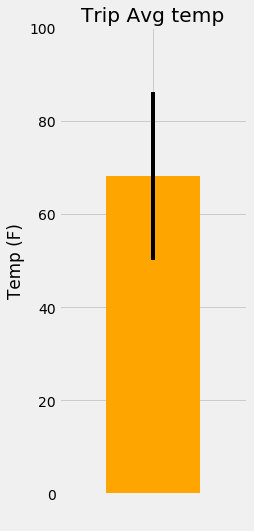

In [136]:
temp_values_DF.plot.bar(y='AverageTemparature',stacked=True
                        , yerr=temp_values_DF['MaximumTemparature'][0]-temp_values_DF['MinimumTemparature'][0]
                        , figsize=(3,8),legend=False,color='Orange')
plt.xlabel(' ')
plt.xticks([0], [" "])
plt.ylabel('Temp (F)')
plt.ylim(0,100)
plt.title('Trip Avg temp')
plt.savefig('plots/temp_avg.png')

# Optional Analysis : Rainfall

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

  * Calcualte the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

  * Create a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

  * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

  * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

  * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.


In [137]:
sta_rainfall_stmt = session.query(Station.st_id,func.avg(Measurement.prcp).label('AverageRainfall')).\
    filter(Station.st_id == Measurement.st_id).\
    filter(Measurement.rec_date >= qry_start_dt).\
    filter(Measurement.rec_date <= qry_end_dt).\
    group_by(Station.st_id).statement


sta_rainfall_DF = pd.read_sql_query(sta_rainfall_stmt, session.bind)

sta_rainfall_DF.head(10)

,st_id,AverageRainfall
0,USC00513117,0.141429
1,USC00514830,0.125434
2,USC00516128,0.450640
3,USC00517948,0.076500
4,USC00519281,0.198949
5,USC00519397,0.044819
6,USC00519523,0.121051


In [138]:
def daily_normals(datestring):
    #print(datestring)
    sel = [func.min(Measurement.tobs)
          ,func.avg(Measurement.tobs)
          ,func.max(Measurement.tobs)
          ]
    daily_data=session.query(*sel).\
                filter(func.strftime("%m-%d" , Measurement.rec_date) == datestring).\
                group_by(func.strftime("%m-%d" , Measurement.rec_date)).all()
    return(daily_data)


In [139]:
print(f"Vacation matching dates last year : from {vac_lastyr_start_dt} to {vac_lastyr_end_dt}" )

trip_dates = []
trip_dates_val = []
for day in range(int ((vac_lastyr_end_dt-vac_lastyr_start_dt).days)):
    date_val = vac_lastyr_start_dt + dt.timedelta(day)
    trip_dates.append(date_val)
    date_val = dt.datetime.strftime(date_val,"%m-%d")
    trip_dates_val.append(date_val)
    
    
trip_daily_normals =[]
trip_daily_min=[]
trip_daily_max=[]
trip_daily_avg=[]

for day in trip_dates_val:
    trip_daily_normals=daily_normals(day)   
    trip_daily_min.append(trip_daily_normals[0][0])
    trip_daily_avg.append(trip_daily_normals[0][1])
    trip_daily_max.append(trip_daily_normals[0][2])
    
print(trip_daily_min)
print(trip_daily_max)
print(trip_daily_avg)

Vacation matching dates last year : from 2017-01-01 to 2017-01-15
[62.0, 60.0, 62.0, 58.0, 56.0, 61.0, 57.0, 57.0, 58.0, 62.0, 57.0, 57.0, 57.0, 58.0]
[77.0, 77.0, 77.0, 76.0, 76.0, 76.0, 76.0, 75.0, 78.0, 77.0, 78.0, 80.0, 77.0, 77.0]
[69.06, 69.40816326530613, 68.83333333333333, 69.83636363636364, 68.0, 68.88679245283019, 68.38181818181818, 67.2, 68.07272727272728, 69.81132075471699, 67.07843137254902, 67.12, 66.68085106382979, 69.42592592592592]


In [140]:
trip_daily_normals_dict = { 'date':trip_dates,
                            'mintemp':trip_daily_min,
                            'avgtemp':trip_daily_avg,
                            'maxtemp':trip_daily_max
                          }
trip_daily_normals_df = pd.DataFrame(trip_daily_normals_dict)
trip_daily_normals_df.head(20)


,avgtemp,date,maxtemp,mintemp
0,69.060000,2017-01-01,77.0,62.0
1,69.408163,2017-01-02,77.0,60.0
2,68.833333,2017-01-03,77.0,62.0
3,69.836364,2017-01-04,76.0,58.0
4,68.000000,2017-01-05,76.0,56.0
5,68.886792,2017-01-06,76.0,61.0
6,68.381818,2017-01-07,76.0,57.0
7,67.200000,2017-01-08,75.0,57.0
8,68.072727,2017-01-09,78.0,58.0
9,69.811321,2017-01-10,77.0,62.0


In [141]:
trip_daily_normals_df= trip_daily_normals_df.set_index("date")

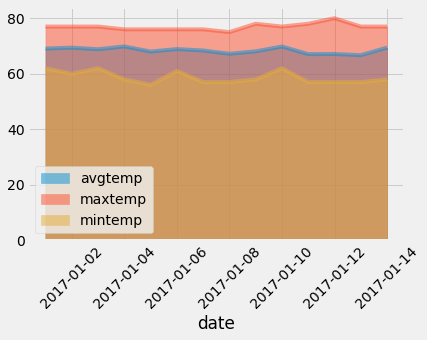

In [142]:

trip_daily_normals_df.plot(kind="area", stacked=False)
#plt.xticks(list(trip_daily_normals_df.index))
plt.xticks(rotation=45)

plt.savefig('plots/daily_normals.png')
plt.show()